<a href="https://colab.research.google.com/github/TyamanovaMargo/DI-Bootcamp/blob/main/DailyChallenge_StatforML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns
from scipy.stats import ttest_ind

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [4]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input
file_1 = "/content/Churn_Modelling.csv"

In [5]:
## TODO : make into a dataframe called df
df = pd.read_csv(file_1)

In [6]:
## TODO : output the first 5 lines
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively
df_0 = df[df["Exited"] == 0]  # stay

df_1 = df[df["Exited"] == 1] # leave


## Hypothesis 1: Age

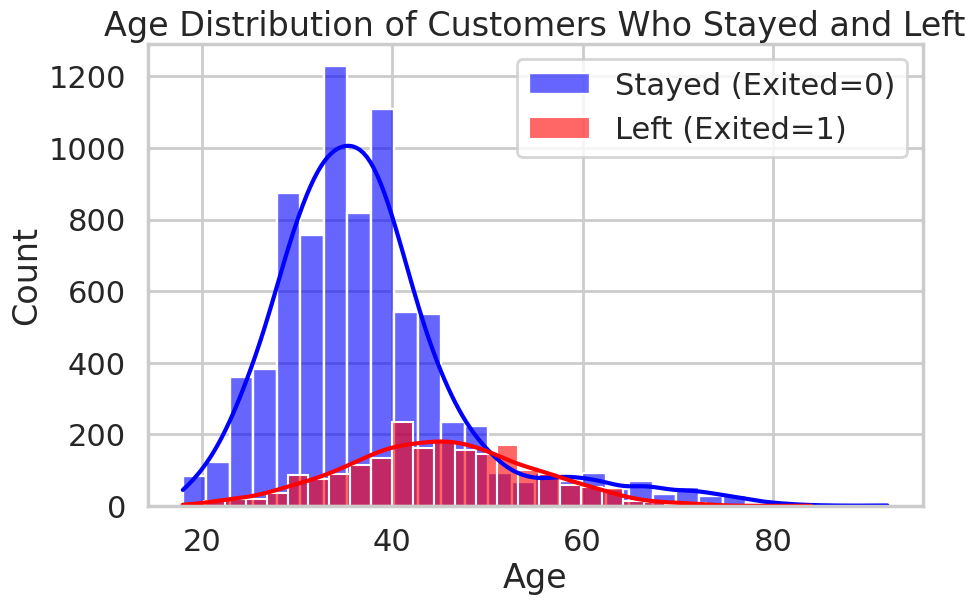

In [9]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.
# Ensure the 'Exited' column exists (0 = Stayed, 1 = Left)
if 'Exited' not in df.columns:
    raise ValueError("Column 'Exited' not found in dataset.")

# Set the Seaborn style
sns.set_style("whitegrid")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[df["Exited"] == 0]["Age"], bins=30, kde=True, color="blue", label="Stayed (Exited=0)", alpha=0.6)
sns.histplot(df[df["Exited"] == 1]["Age"], bins=30, kde=True, color="red", label="Left (Exited=1)", alpha=0.6)

# Add labels and legend
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Customers Who Stayed and Left")
plt.legend()

# Show the plot
plt.show()


In [10]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.
mean_stayed = df_0["Age"].mean()
std_stayed = df_0["Age"].std()

In [11]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.
mean_left = df_1["Age"].mean()
std_left = df_1["Age"].std()

In [14]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.
t_stat, p_value = ttest_ind(df_1["Age"],df_0["Age"],  equal_var=False)

# results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 30.4192
P-value: 0.0000


### Using Bootstrapping

In [15]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
def bs_choice(data, func, size):
    bs_s = np.zeros(size)
    for i in range(size):
        bs_abc = np.random.choice(data, size=len(data), replace=True)
        bs_s[i] = func(bs_abc)
    return bs_s

In [18]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.
# diff means
diff_means = mean_left - mean_stayed
print(f"Difference in means: {diff_means:.4f}")

overall_mean = np.mean(np.concatenate([df_0["Age"], df_1["Age"]]))

#
df_0_shifted = df_0["Age"] - mean_stayed + overall_mean
df_1_shifted = df_1["Age"] - mean_left + overall_mean



Difference in means: 7.4296


In [23]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.
bs_size = 100000

#  bootstrap for the standard deviation
bs_std_0 = bs_choice(df_0["Age"], np.std, bs_size)
bs_std_1 = bs_choice(df_1["Age"], np.std, bs_size)


In [25]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.
p_value = np.sum(bs_std_0 - bs_std_1 >= diff_means) / bs_size
print(f"P-value: {p_value:.4f}")

P-value: 0.0000


### Conclusion
Do we reject the Null Hypothesis ? Why ?

In [ ]:
'''P-value: 0.0000 (very small)'''

## Hypothesis 2: Credit Score

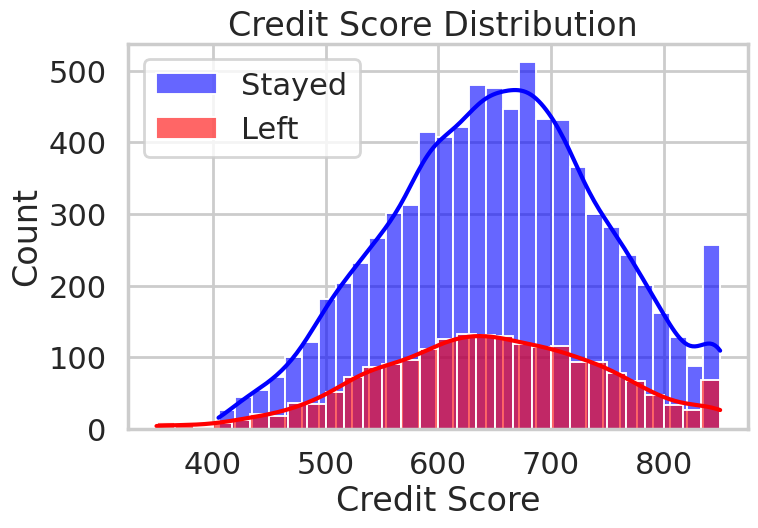

In [26]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).
sns.set_style("whitegrid")

# plt.figure(figsize=(10, 6))
sns.histplot(df_0["CreditScore"], bins=30, kde=True, color="blue", label="Stayed", alpha=0.6)
sns.histplot(df_1["CreditScore"], bins=30, kde=True, color="red", label="Left", alpha=0.6)


plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.title("Credit Score Distribution ")
plt.legend()

# plot shows
plt.show()


In [29]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).
t_stat, p_value = ttest_ind(df_1["CreditScore"],df_0["CreditScore"],  equal_var=False)
print(t_stat) # means that the average age of customers who stayed with the bank is significantly higher than that of those who left.
print(p_value)

-2.6346605436575796
0.008464728991832862


### Conclusion
Do we reject the Null Hypothesis ? Why ?

In [ ]:
'''p value < 0.05, we reject the null hypothesis (H₀), meaning there is a significant difference in CreditScore between customers who stayed and those who left.'''

## Hypothesis 3: Balance

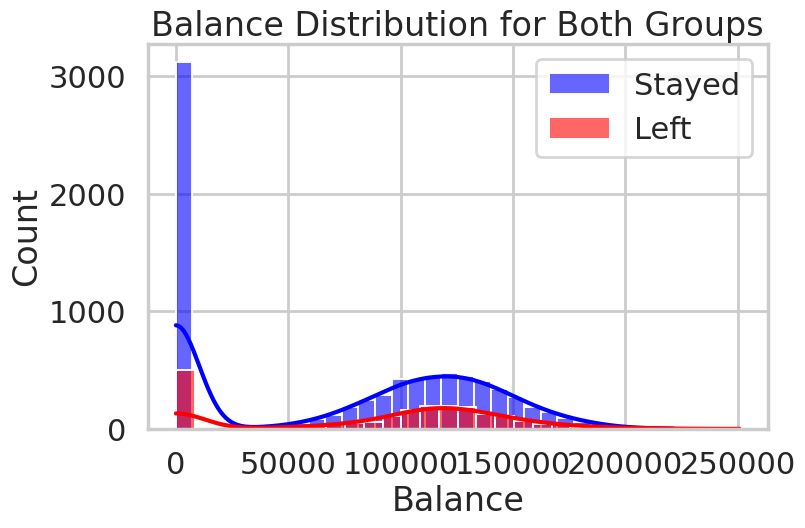

In [30]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).
sns.histplot(df_0["Balance"], bins=30, kde=True, color="blue", label="Stayed", alpha=0.6)
sns.histplot(df_1["Balance"], bins=30, kde=True, color="red", label="Left", alpha=0.6)


plt.xlabel("Balance")
plt.ylabel("Count")
plt.title("Balance Distribution for Both Groups")
plt.legend()


plt.show()

In [32]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.
t_stat, p_value = ttest_ind(df_1["Balance"],df_0["Balance"],  equal_var=False)
print(t_stat) #This indicates that the average value of the first group (df_0["Balance"]) is greater than that of the second (df_1["Balance"]).
print(p_value)

12.471280320050688
6.318663518527974e-35


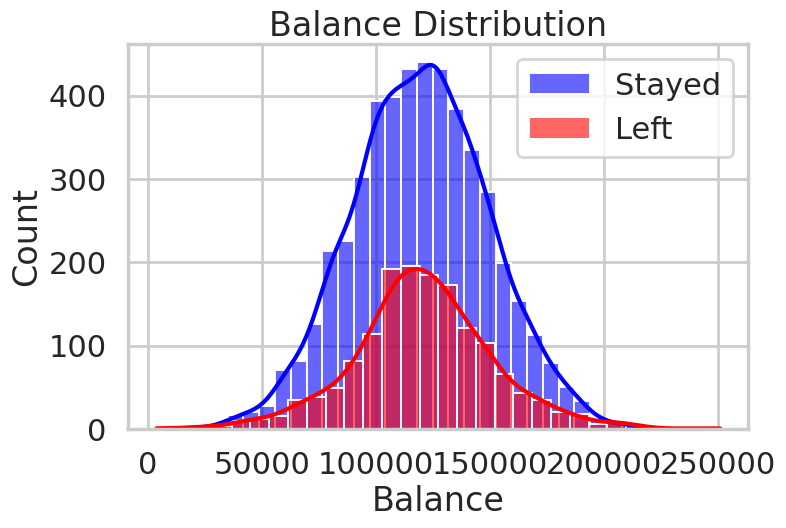

In [33]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.
# Filter out zero balances
df_0_nonzero = df_0[df_0["Balance"] > 0]
df_1_nonzero = df_1[df_1["Balance"] > 0]


# Plot histograms with KDE
sns.histplot(df_0_nonzero["Balance"], bins=30, kde=True, color="blue", label="Stayed", alpha=0.6)
sns.histplot(df_1_nonzero["Balance"], bins=30, kde=True, color="red", label="Left", alpha=0.6)

# Labels and title
plt.xlabel("Balance")
plt.ylabel("Count")
plt.title("Balance Distribution")

# Legend
plt.legend()

# Show the plot
plt.show()


In [34]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.
t_stat, p_value = ttest_ind(df_1_nonzero["Balance"],df_0_nonzero["Balance"],  equal_var=False)
print(t_stat)
print(p_value)

1.3604774889985365
0.17379960354870824


## Conclusion

Do we reject the Null Hypothesis ? Why ?

In [ ]:
'''P-value = 0.1738 (greater than 0.05)
Fail to reject H₀'''

## Hypothesis 4: Estimated Salary

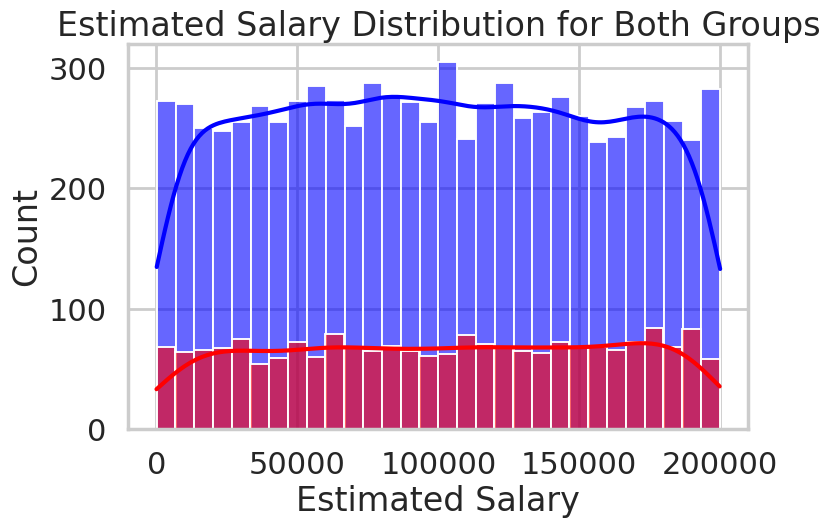

In [35]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.
sns.histplot(df_0["EstimatedSalary"], bins=30, kde=True, color="blue", label="Stayed", alpha=0.6)
sns.histplot(df_1["EstimatedSalary"], bins=30, kde=True, color="red", label="Left", alpha=0.6)


plt.xlabel("Estimated Salary")
plt.ylabel("Count")
plt.title("Estimated Salary Distribution for Both Groups")


plt.show()

In [36]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.
t_stat, p_value = ttest_ind(df_1["EstimatedSalary"],df_0["EstimatedSalary"],  equal_var=False)
print(t_stat)
print(p_value)

1.2033683196586242
0.22892461305145795


### Using Bootstrapping

In [37]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.
mean_stayed = df_0["EstimatedSalary"].mean()
mean_left = df_1["EstimatedSalary"].mean()

diff_means = mean_left - mean_stayed
print(f"Difference in means: {diff_means:.4f}")

Difference in means: 1727.2858


on average, customers who left the bank had an EstimatedSalary that was 1,727.29 higher than those who stayed.

In [41]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.
bs_size = 100000


#  bootstrap for the standard deviation
bs_std_0 = bs_choice(df_0["EstimatedSalary"].values, np.mean, bs_size)
bs_std_1 = bs_choice(df_1["EstimatedSalary"].values, np.mean, bs_size)

In [42]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.
p_value = np.sum(bs_std_0 - bs_std_1 >= diff_means) / bs_size
print(f"P-value: {p_value:.4f}")

P-value: 0.0079


f p < 0.05, we reject the null hypothesis (H₀), meaning there is a significant difference in EstimatedSalary between customers who stayed and those who left.

Since 0.0079 < 0.05, the probability of observing this difference by chance is very low.



### Conclusion
Do we reject the Null Hypothesis ? Why ?

In [ ]:

'''if p < 0.05, we reject the null hypothesis (H₀), meaning there is a significant difference in EstimatedSalary between customers who stayed and those who left.

Since 0.0079 < 0.05, the probability of observing this difference by chance is very low.


## Final Conclusion
What will be the most helpful feature in predicting churning?


In [ ]:
'''Age,Credit Score and Estimated Salary are will bw most helpul in predicting churning.'''